In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
df=pd.read_csv('alzheimers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [ ]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


# Checking for missing values

In [ ]:
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
Education Level,0
BMI,0
Physical Activity Level,0
Smoking Status,0
Alcohol Consumption,0
Diabetes,0
Hypertension,0


# Visualization

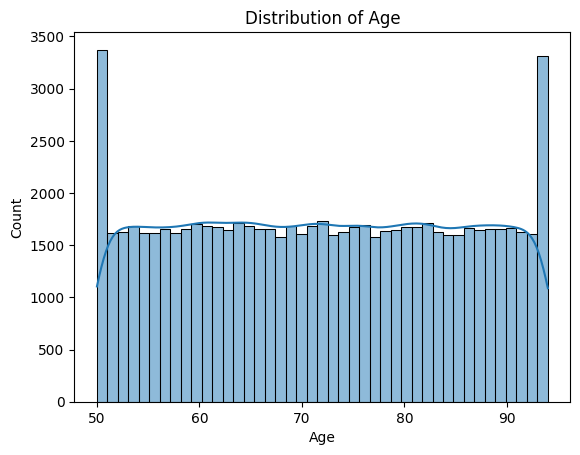

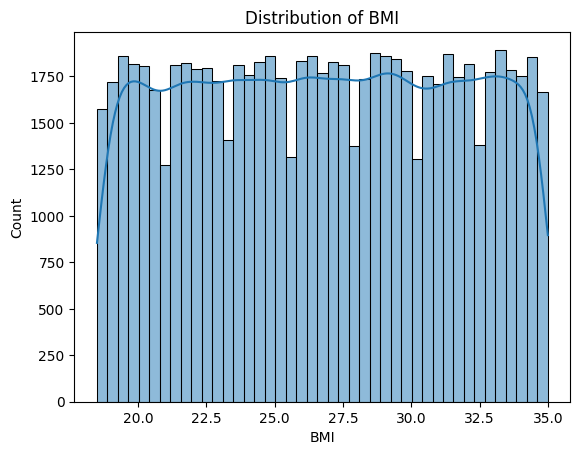

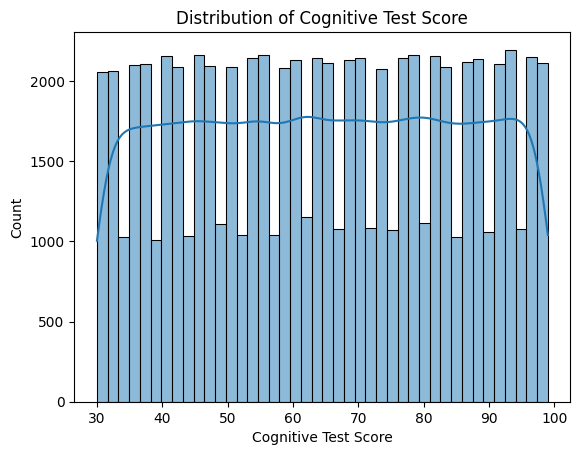

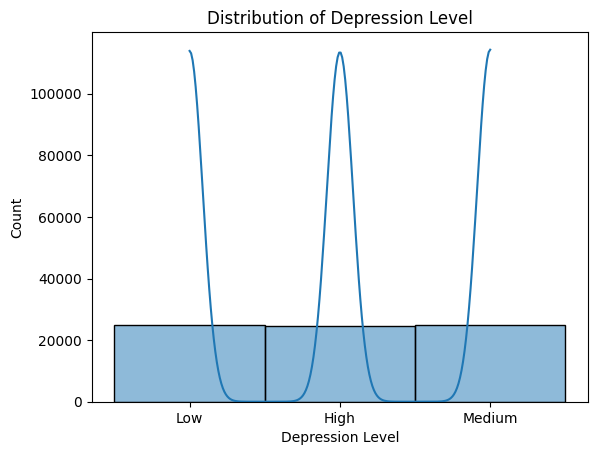

In [ ]:
numerical_features = ['Age', 'BMI', 'Cognitive Test Score', 'Depression Level']
for feature in numerical_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


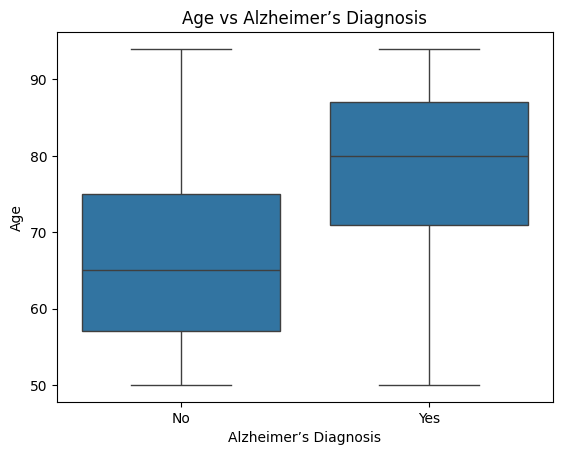

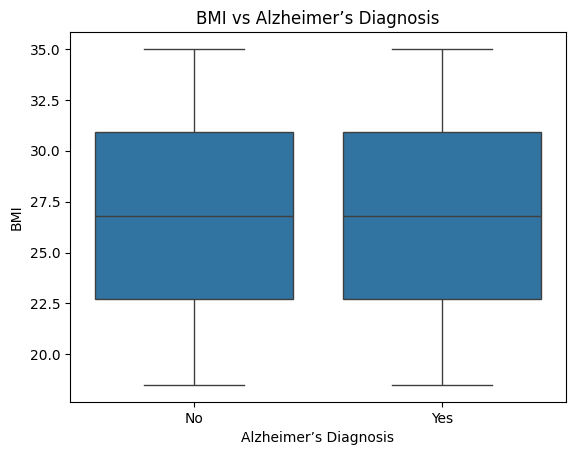

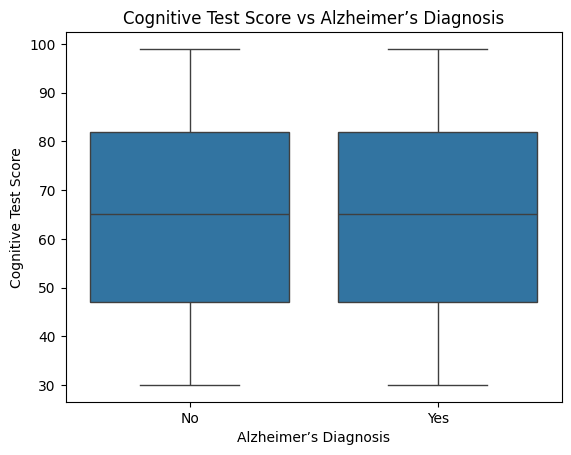

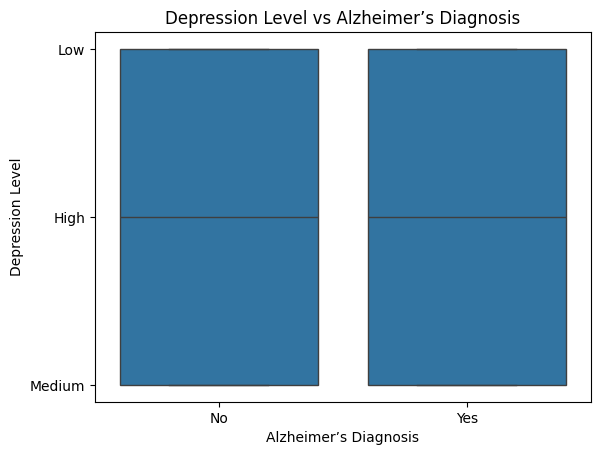

In [ ]:
for feature in numerical_features:
    sns.boxplot(x='Alzheimer’s Diagnosis', y=feature, data=df)
    plt.title(f'{feature} vs Alzheimer’s Diagnosis')
    plt.show()

<ipython-input-11-96ac8a92b6e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Alzheimer’s Diagnosis", palette="pastel")


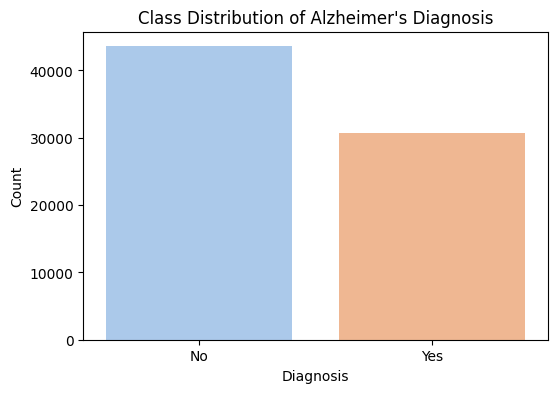

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Alzheimer’s Diagnosis", palette="pastel")
plt.title("Class Distribution of Alzheimer's Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# Encoding

In [ ]:
df = df.drop(columns=['Country'])

In [ ]:
df['Alzheimer’s Diagnosis'] = df['Alzheimer’s Diagnosis'].map({'Yes': 1, 'No': 0})

In [ ]:
df = pd.get_dummies(df, columns=[
    "Gender", "Physical Activity Level", "Smoking Status",
    "Alcohol Consumption", "Diabetes", "Hypertension",
    "Cholesterol Level", "Family History of Alzheimer’s",
    "Depression Level", "Sleep Quality", "Dietary Habits",
    "Air Pollution Exposure", "Employment Status",
    "Marital Status", "Genetic Risk Factor (APOE-ε4 allele)",
    "Social Engagement Level", "Income Level", "Stress Levels",
    "Urban vs Rural Living"
], drop_first=True)


In [ ]:
df.head()

,Age,Education Level,BMI,Cognitive Test Score,Alzheimer’s Diagnosis,Gender_Male,Physical Activity Level_Low,Physical Activity Level_Medium,Smoking Status_Former,Smoking Status_Never,...,Marital Status_Single,Marital Status_Widowed,Genetic Risk Factor (APOE-ε4 allele)_Yes,Social Engagement Level_Low,Social Engagement Level_Medium,Income Level_Low,Income Level_Medium,Stress Levels_Low,Stress Levels_Medium,Urban vs Rural Living_Urban
0,90,1,33.0,90,0,True,False,True,False,True,...,True,False,False,True,False,False,True,False,False,True
1,72,7,29.9,65,0,True,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
2,86,19,22.9,43,0,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
3,53,17,31.2,81,0,True,True,False,False,True,...,True,False,False,False,False,False,True,True,False,False
4,58,3,30.0,49,0,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False


# correlation

In [ ]:
df.columns

Index(['Age', 'Education Level', 'BMI', 'Cognitive Test Score',
       'Alzheimer’s Diagnosis', 'Gender_Male', 'Physical Activity Level_Low',
       'Physical Activity Level_Medium', 'Smoking Status_Former',
       'Smoking Status_Never', 'Alcohol Consumption_Occasionally',
       'Alcohol Consumption_Regularly', 'Diabetes_Yes', 'Hypertension_Yes',
       'Cholesterol Level_Normal', 'Family History of Alzheimer’s_Yes',
       'Depression Level_Low', 'Depression Level_Medium', 'Sleep Quality_Good',
       'Sleep Quality_Poor', 'Dietary Habits_Healthy',
       'Dietary Habits_Unhealthy', 'Air Pollution Exposure_Low',
       'Air Pollution Exposure_Medium', 'Employment Status_Retired',
       'Employment Status_Unemployed', 'Marital Status_Single',
       'Marital Status_Widowed', 'Genetic Risk Factor (APOE-ε4 allele)_Yes',
       'Social Engagement Level_Low', 'Social Engagement Level_Medium',
       'Income Level_Low', 'Income Level_Medium', 'Stress Levels_Low',
       'Stress Levels_Me

Text(0.5, 1.0, 'Correlation Matrix')

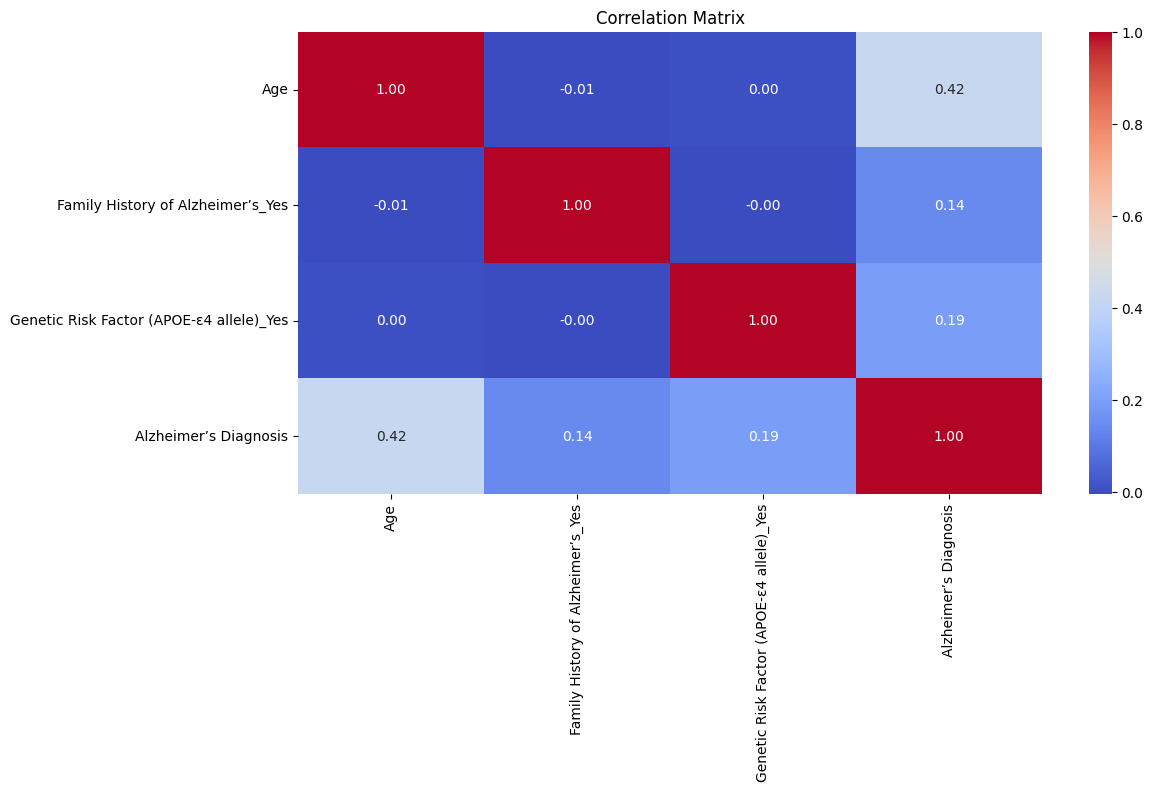

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[['Age', 'Family History of Alzheimer’s_Yes', 'Genetic Risk Factor (APOE-ε4 allele)_Yes','Alzheimer’s Diagnosis']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Alzheimer’s Diagnosis'])
y = df['Alzheimer’s Diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Training

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)


y_pred_log = log_reg.predict(x_test)
y_pred_proba_log = log_reg.predict_proba(x_test)[:, 1]

accuracy_log = accuracy_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"ROC-AUC: {roc_auc_log:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("-" * 50)

Logistic Regression Results:
Accuracy: 0.7122
ROC-AUC: 0.7864
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      8719
           1       0.67      0.60      0.63      6138

    accuracy                           0.71     14857
   macro avg       0.70      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857

Confusion Matrix:
 [[6898 1821]
 [2455 3683]]
--------------------------------------------------


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
y_pred_proba_knn = knn.predict_proba(x_test)[:, 1]

accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print("KNN Results:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"ROC-AUC: {roc_auc_knn:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("-" * 50)

KNN Results:
Accuracy: 0.6322
ROC-AUC: 0.6501
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.75      0.71      8719
           1       0.57      0.46      0.51      6138

    accuracy                           0.63     14857
   macro avg       0.62      0.61      0.61     14857
weighted avg       0.62      0.63      0.62     14857

Confusion Matrix:
 [[6577 2142]
 [3323 2815]]
--------------------------------------------------


# SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)
y_pred_proba_svm = svm.predict_proba(x_test)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print("Support Vector Machine (SVM) Results:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"ROC-AUC: {roc_auc_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("-" * 50)

Support Vector Machine (SVM) Results:
Accuracy: 0.7078
ROC-AUC: 0.7737
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      8719
           1       0.66      0.60      0.63      6138

    accuracy                           0.71     14857
   macro avg       0.70      0.69      0.69     14857
weighted avg       0.71      0.71      0.71     14857

Confusion Matrix:
 [[6825 1894]
 [2447 3691]]
--------------------------------------------------


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


y_pred_dt = dt.predict(x_test)
y_pred_proba_dt = dt.predict_proba(x_test)[:, 1]


accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)


print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"ROC-AUC: {roc_auc_dt:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("-" * 50)


Decision Tree Results:
Accuracy: 0.6328
ROC-AUC: 0.6235
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68      8719
           1       0.55      0.57      0.56      6138

    accuracy                           0.63     14857
   macro avg       0.62      0.62      0.62     14857
weighted avg       0.63      0.63      0.63     14857

Confusion Matrix:
 [[5901 2818]
 [2638 3500]]
--------------------------------------------------


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)


y_pred_rf = rf.predict(x_test)
y_pred_proba_rf = rf.predict_proba(x_test)[:, 1]


accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)


print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("-" * 50)


Random Forest Results:
Accuracy: 0.7150
ROC-AUC: 0.7878
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      8719
           1       0.66      0.63      0.65      6138

    accuracy                           0.72     14857
   macro avg       0.71      0.70      0.70     14857
weighted avg       0.71      0.72      0.71     14857

Confusion Matrix:
 [[6753 1966]
 [2268 3870]]
--------------------------------------------------


# XGBoost

In [ ]:
from xgboost import XGBClassifier

# Initialize and train
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(x_test)
y_pred_proba_xgb = xgb.predict_proba(x_test)[:, 1]

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Print results
print("🔹 XGBoost Results:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("-" * 50)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Results:
Accuracy: 0.7108
ROC-AUC: 0.7808
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      8719
           1       0.65      0.65      0.65      6138

    accuracy                           0.71     14857
   macro avg       0.70      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857

Confusion Matrix:
 [[6593 2126]
 [2170 3968]]
--------------------------------------------------


# Compare between models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


model_results = {}


def evaluate_model(name, y_true, y_pred, y_probs):
    model_results[name] = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_probs)
    }


evaluate_model("Logistic Regression", y_test, y_pred_log , y_pred_proba_log )
evaluate_model("KNN", y_test, y_pred_knn, y_pred_proba_knn)
evaluate_model("SVM", y_test, y_pred_svm, y_pred_proba_svm)
evaluate_model("Decision Tree", y_test, y_pred_dt, y_pred_proba_dt)
evaluate_model("Random Forest", y_test, y_pred_rf, y_pred_proba_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb,y_pred_proba_xgb)


results_df = pd.DataFrame(model_results).T
print(results_df)


                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.712190   0.669150  0.600033  0.632709  0.786402
KNN                  0.632160   0.567884  0.458618  0.507436  0.650081
SVM                  0.707814   0.660877  0.601336  0.629702  0.773720
Decision Tree        0.632766   0.553973  0.570218  0.561978  0.623508
Random Forest        0.715016   0.663125  0.630499  0.646401  0.787755
XGBoost              0.710843   0.651132  0.646465  0.648790  0.780825
